# Geospatial Data Analytics Final Spring 2023


## General Instructions
You will upload a single jupyter notebook that completes all the following questions onto Brightspace. Do not upload this notebook to GitHub! I do not want you to be able to view each other's responses. The only item that will go on GitHub is the final interactive map produced in Section 3. You will have until midnight Wednesday April 5th to upload.

## Background
In 2022, California experienced the driest January, February and March in over 100 years ([source](https://drought.ca.gov/#:~:text=Tracking%20conditions&text=These%20include%20reservoirs%20and%20melted,March%20in%20over%20100%20years.)). Fast forward to 2023 and we have experienced what appears to be one of the wettest winters. The premise of this final exam is to prepare a comprehensive geospatial analysis which provides data analytics to support the extreme dry and wet conditions we have recently experienced locally in Los Angeles. 

## Part 1: Time series evaluations
You a provided a dataset for daily metereological data for Los Angeles county weather stations (``` data/noaa-daily-la-county-weather-data.csv ```) for March 30th 2018 until March 30th 2023. Complete the following tasks:

1. Load the dataset. How many unique stations are there?

In [13]:
import pandas as pd
noaa_data = pd.read_csv("data/noaa-daily-la-county-weather-data.csv", parse_dates=['DATE'])
noaa_data.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  
0 2018-03-30   0.0  
1 2018-03-31   0.0  
2 2018-04-01   0.0  
3 2018-04-02   0.0  
4 2018-04-03   0.0

In [15]:
unique_stns = noaa_data["STATION"].unique()
no_unique_stns = len(unique_stns)
print('count of unique stations: ',no_unique_stns)

count of unique stations:  96


2. Create a new dataframes of precipitation (```PRCP ```) data for a station located in Pasadena (where ```STATION``` is ```US1CALA0036```).

In [16]:
station_selection = ["US1CALA0036"]
pasadena_data = noaa_data.loc[noaa_data["STATION"].isin(station_selection)]

In [17]:
pasadena_data.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  
0 2018-03-30   0.0  
1 2018-03-31   0.0  
2 2018-04-01   0.0  
3 2018-04-02   0.0  
4 2018-04-03   0.0

3. For this precipitation dataframe, how many days did daily precipitation exceed 1 inch in March 2023? How about for March 2022? 

In [18]:
pasadena_data.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
PRCP                float64
dtype: object

In [19]:
pasadena_data["PRCP"].hasnans

True

In [20]:
pasadena_data["DATE"].hasnans

False

In [21]:
cols_to_check = ["PRCP"]
pasadena_clean = pasadena_data.dropna(subset=cols_to_check)
pasadena_clean["PRCP"].hasnans

False

In [22]:
pasadena_clean["PRCP"].astype(int).head()

0    0
1    0
2    0
3    0
4    0
Name: PRCP, dtype: int64

In [23]:
pasadena_clean = pasadena_clean.reset_index(drop=True)

- review the solutions posted for quiz-01
- parse the date column when loading the dataset initially

In [24]:
pasadena_clean['MONTH'] = pasadena_clean['DATE'].astype(str).str.slice(start=5,stop=7)
pasadena_clean['YEAR'] = pasadena_clean['DATE'].astype(str).str.slice(start=0,stop=4)

In [25]:
pasadena_clean.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP MONTH  YEAR  
0 2018-03-30   0.0    03  2018  
1 2018-03-31   0.0    03  2018  
2 2018-04-01   0.0    04  2018  
3 2018-04-02   0.0    04  2018  
4 2018-04-03   0.0    04  2018

In [30]:
selection_2023 = ["2023"]
pasadena_2023 = pasadena_clean.loc[pasadena_clean["YEAR"].isin(selection_2023)]
pasadena_2023.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
1716  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1717  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1718  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1719  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1720  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

           DATE  PRCP MONTH  YEAR  
1716 2023-01-01  1.28    01  2023  
1717 2023-01-02  0.03    01  2023  
1718 2023-01-03  0.13    01  2023  
1719 2023-01-04  0.54    01  2023  
1720 2023-01-05  1.90    01  2023

In [36]:
selection_2022 = ["2022"]
pasadena_2022 = pasadena_clean.loc[pasadena_clean["YEAR"].isin(selection_2022)]
pasadena_2022.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
1369  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1370  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1371  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1372  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1373  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

           DATE  PRCP MONTH  YEAR  
1369 2022-01-01   0.0    01  2022  
1370 2022-01-02   0.0    01  2022  
1371 2022-01-03   0.0    01  2022  
1372 2022-01-04   0.0    01  2022  
1373 2022-01-05   0.0    01  2022

In [31]:
selection_march_2023 = ["03"]
pasadena_march_2023 = pasadena_2023.loc[pasadena_2023["MONTH"].isin(selection_march_2023)]
pasadena_march_2023.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
1775  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1776  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1777  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1778  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1779  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

           DATE  PRCP MONTH  YEAR  
1775 2023-03-01  1.66    03  2023  
1776 2023-03-02  0.00    03  2023  
1777 2023-03-03  0.00    03  2023  
1778 2023-03-04  0.00    03  2023  
1779 2023-03-05  0.03    03  2023

In [37]:
selection_march_2022 = ["03"]
pasadena_march_2022 = pasadena_2022.loc[pasadena_2022["MONTH"].isin(selection_march_2022)]
pasadena_march_2022.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
1410  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1411  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1412  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1413  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1414  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

           DATE  PRCP MONTH  YEAR  
1410 2022-03-01  0.00    03  2022  
1411 2022-03-02  0.00    03  2022  
1412 2022-03-03  0.00    03  2022  
1413 2022-03-04  0.01    03  2022  
1414 2022-03-05  0.04    03  2022

In [35]:
pasadena_march_2023.reset_index(drop=True)

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
5   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
6   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
7   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
8   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
9   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
10  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
11  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
12  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
13  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
14  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
15  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
16  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
17  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
18  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
19  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
20  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
21  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
22  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
23  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
24  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
25  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
26  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
27  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
28  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
29  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

         DATE  PRCP MONTH  YEAR  
0  2023-03-01  1.66    03  2023  
1  2023-03-02  0.00    03  2023  
2  2023-03-03  0.00    03  2023  
3  2023-03-04  0.00    03  2023  
4  2023-03-05  0.03    03  2023  
5  2023-03-06  0.01    03  2023  
6  2023-03-07  0.00    03  2023  
7  2023-03-08  0.00    03  2023  
8  2023-03-09  0.00    03  2023  
9  2023-03-10  0.93    03  2023  
10 2023-03-11  0.17    03  2023  
11 2023-03-12  0.06    03  2023  
12 2023-03-13  0.00    03  2023  
13 2023-03-14  0.63    03  2023  
14 2023-03-15  3.21    03  2023  
15 2023-03-16  0.02    03  2023  
16 2023-03-17  0.00    03  2023  
17 2023-03-18  0.00    03  2023  
18 2023-03-19  0.04    03  2023  
19 2023-03-20  0.09    03  2023  
20 2023-03-21  1.47    03  2023  
21 2023-03-22  1.28    03  2023  
22 2023-03-23  0.12    03  2023  
23 2023-03-24  0.13    03  2023  
24 2023-03-25  0.00    03  2023  
25 2023-03-26  0.00    03  2023  
26 2023-03-27  0.00    03  2023  
27 2023-03-28  0.00    03  2023  
28 2023-03-29  0.48    03  2023  
29 2023-03-30  0.45    03  2023

In [38]:
pasadena_march_2022.reset_index(drop=True)

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
5   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
6   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
7   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
8   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
9   US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
10  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
11  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
12  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
13  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
14  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
15  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
16  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
17  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
18  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
19  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
20  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
21  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
22  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
23  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
24  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
25  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
26  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
27  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
28  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
29  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
30  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

         DATE  PRCP MONTH  YEAR  
0  2022-03-01  0.00    03  2022  
1  2022-03-02  0.00    03  2022  
2  2022-03-03  0.00    03  2022  
3  2022-03-04  0.01    03  2022  
4  2022-03-05  0.04    03  2022  
5  2022-03-06  0.00    03  2022  
6  2022-03-07  0.00    03  2022  
7  2022-03-08  0.00    03  2022  
8  2022-03-09  0.00    03  2022  
9  2022-03-10  0.00    03  2022  
10 2022-03-11  0.00    03  2022  
11 2022-03-12  0.00    03  2022  
12 2022-03-13  0.00    03  2022  
13 2022-03-14  0.00    03  2022  
14 2022-03-15  0.00    03  2022  
15 2022-03-16  0.00    03  2022  
16 2022-03-17  0.00    03  2022  
17 2022-03-18  0.00    03  2022  
18 2022-03-19  0.00    03  2022  
19 2022-03-20  0.00    03  2022  
20 2022-03-21  0.00    03  2022  
21 2022-03-22  0.00    03  2022  
22 2022-03-23  0.00    03  2022  
23 2022-03-24  0.00    03  2022  
24 2022-03-25  0.00    03  2022  
25 2022-03-26  0.00    03  2022  
26 2022-03-27  0.00    03  2022  
27 2022-03-28  2.03    03  2022  
28 2022-03-29  0.34    03  2022  
29 2022-03-30  0.00    03  2022  
30 2022-03-31  0.00    03  2022

santa_monica_count = len(santa_monica[(santa_monica['Avg Air Temp (F)'] < 50) | (santa_monica['Avg Air Temp (F)'] > 100)])
print('The number of days when the temperature was below 50 or above 100 degrees fahrenheit in Santa Monica is',santa_monica_count)

For this precipitation dataframe, how many days did daily precipitation exceed 1 inch in March 2023? How about for March 2022? 

In [39]:
march_2023_count = len(pasadena_march_2023[(pasadena_march_2023['PRCP'] > 1)])
print('The number of days when the the daily precipitation exceeded 1 inch in March 2023 is',march_2023_count)

The number of days when the the daily precipitation exceeded 1 inch in March 2023 is 4


In [40]:
march_2022_count = len(pasadena_march_2022[(pasadena_march_2022['PRCP'] > 1)])
print('The number of days when the the daily precipitation exceeded 1 inch in March 2022 is',march_2022_count)

The number of days when the the daily precipitation exceeded 1 inch in March 2022 is 1


4. Create a new column in the precipitation dataframe, and convert inches of precipitation to centimeters. 

In [41]:
def inches_to_centimeters(prcp_inches):
    """Converts temperature in degrees Fahrenheit to degrees Celsius"""
    prcp_centimeters = (prcp_inches*2.54)
    return prcp_centimeters

In [42]:
pasadena_clean['PRCP (cm)'] = pasadena_clean['PRCP'].apply(inches_to_centimeters).round(1)
pasadena_clean.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP MONTH  YEAR  PRCP (cm)  
0 2018-03-30   0.0    03  2018        0.0  
1 2018-03-31   0.0    03  2018        0.0  
2 2018-04-01   0.0    04  2018        0.0  
3 2018-04-02   0.0    04  2018        0.0  
4 2018-04-03   0.0    04  2018        0.0

5. Calculate the sum of precipitation for each month and year of data provided. Select only the March totals. Print this dataframe. Of the years provided - what year was the driest March? What year was the wettest March? 

In [43]:
pasadena_clean['YRMO'] = pasadena_clean['DATE'].astype(str).str.slice(start=0,stop=7)
pasadena_clean.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP MONTH  YEAR  PRCP (cm)     YRMO  
0 2018-03-30   0.0    03  2018        0.0  2018-03  
1 2018-03-31   0.0    03  2018        0.0  2018-03  
2 2018-04-01   0.0    04  2018        0.0  2018-04  
3 2018-04-02   0.0    04  2018        0.0  2018-04  
4 2018-04-03   0.0    04  2018        0.0  2018-04

In [51]:
pasadena_clean_grouped = pasadena_clean.groupby('YRMO').sum().reset_index()
print('Pasadena Yearly Rainfall Data')
display(pasadena_clean_grouped)

Pasadena Yearly Rainfall Data


/tmp/ipykernel_223164/670069372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pasadena_clean_grouped = pasadena_clean.groupby('YRMO').sum().reset_index()


YRMO    LATITUDE   LONGITUDE  ELEVATION   PRCP  PRCP (cm)
0   2018-03    68.27832  -236.23222      450.4   0.00        0.0
1   2018-04  1024.17480 -3543.48330     6756.0   0.00        0.0
2   2018-05   990.03564 -3425.36719     6530.8   0.28        0.7
3   2018-06  1024.17480 -3543.48330     6756.0   0.00        0.0
4   2018-07  1058.31396 -3661.59941     6981.2   0.00        0.0
..      ...         ...         ...        ...    ...        ...
56  2022-11  1024.17480 -3543.48330     6756.0   3.27        8.3
57  2022-12  1058.31396 -3661.59941     6981.2   4.63       11.7
58  2023-01  1058.31396 -3661.59941     6981.2  12.49       31.9
59  2023-02   955.89648 -3307.25108     6305.6   7.60       19.3
60  2023-03  1024.17480 -3543.48330     6756.0  10.78       27.4

[61 rows x 6 columns]

In [52]:
pasadena_clean_grouped['MONTH'] = pasadena_clean_grouped['YRMO'].astype(str).str.slice(start=5,stop=7)
pasadena_clean_grouped['YEAR'] = pasadena_clean_grouped['YRMO'].astype(str).str.slice(start=0,stop=4)
pasadena_clean_grouped.head()

YRMO    LATITUDE   LONGITUDE  ELEVATION  PRCP  PRCP (cm) MONTH  YEAR
0  2018-03    68.27832  -236.23222      450.4  0.00        0.0    03  2018
1  2018-04  1024.17480 -3543.48330     6756.0  0.00        0.0    04  2018
2  2018-05   990.03564 -3425.36719     6530.8  0.28        0.7    05  2018
3  2018-06  1024.17480 -3543.48330     6756.0  0.00        0.0    06  2018
4  2018-07  1058.31396 -3661.59941     6981.2  0.00        0.0    07  2018

In [53]:
month_of_interest = ["03"]
march_totals = pasadena_clean_grouped.loc[pasadena_clean_grouped["MONTH"].isin(month_of_interest)]
march_totals.head()

YRMO    LATITUDE   LONGITUDE  ELEVATION  PRCP  PRCP (cm) MONTH  YEAR
0   2018-03    68.27832  -236.23222      450.4  0.00        0.0    03  2018
12  2019-03  1058.31396 -3661.59941     6981.2  2.78        7.1    03  2019
24  2020-03  1058.31396 -3661.59941     6981.2  4.28       11.0    03  2020
36  2021-03  1058.31396 -3661.59941     6981.2  1.22        3.1    03  2021
48  2022-03  1058.31396 -3661.59941     6981.2  2.42        6.2    03  2022

In [60]:
print("The wettest march was:", march_totals.max())

The wettest march was: YRMO            2023-03
LATITUDE     1058.31396
LONGITUDE    -236.23222
ELEVATION        6981.2
PRCP              10.78
PRCP (cm)          27.4
MONTH                03
YEAR               2023
dtype: object


In [61]:
print("The driest march was:", march_totals.min())

The driest march was: YRMO            2018-03
LATITUDE       68.27832
LONGITUDE   -3661.59941
ELEVATION         450.4
PRCP                0.0
PRCP (cm)           0.0
MONTH                03
YEAR               2018
dtype: object


## Part 2: Comparisons of vegetation health at Griffith Park
You are provided two Sentinel-2 datasets, one for March 2022 (``` data/2022-03-09/ ```) and another for March 2023 (``` data/2023-03-24/ ```). You will make a comparison of vegetation health differences between the two years in Griffith Park.

1. Load and calculate NDVI for both dates.

In [106]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from PIL import Image
from shapely.geometry import mapping

NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion: 
(NIR - R) / (NIR + R)

- NIR = band 8
- R = band 4

In [99]:
b4_2022 = rxr.open_rasterio('data/2022-03-09/2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B04_(Raw).tiff', masked=True).squeeze()
b8_2022 = rxr.open_rasterio('data/2022-03-09/2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B08_(Raw).tiff', masked=True).squeeze()
ndvi_2022 = (b8_2022 - b4_2022)/(b8_2022 + b4_2022)

In [100]:
b4_2023 = rxr.open_rasterio('data/2023-03-24/2023-03-24-00:00_2023-03-24-23:59_Sentinel-2_L2A_B04_(Raw).tiff', masked=True).squeeze()
b8_2023 = rxr.open_rasterio('data/2023-03-24/2023-03-24-00:00_2023-03-24-23:59_Sentinel-2_L2A_B08_(Raw).tiff', masked=True).squeeze()
ndvi_2023 = (b8_2023 - b4_2023)/(b8_2023 + b4_2023)

In [101]:
# View the Coordinate Reference System (CRS) 
print("The CRS for 2023 data is:", ndvi_2023.rio.crs)
print("The CRS for 2022 data is:", ndvi_2022.rio.crs)

# View the spatial extent
print("The 2023 spatial extent is:", ndvi_2023.rio.bounds())
print("The 2022 spatial extent is:", ndvi_2022.rio.bounds())

# What is the x and y resolution for your raster data?
print("The 2023 resolution is:", ndvi_2023.rio.resolution())
print("The 2022 resolution is:", ndvi_2022.rio.resolution())

The CRS for 2023 data is: EPSG:3857
The CRS for 2022 data is: EPSG:3857
The 2023 spatial extent is: (-13181907.40972017, 4041176.0580622577, -13163677.173310408, 4051647.876708401)
The 2022 spatial extent is: (-13181907.40972017, 4041176.0580622577, -13163677.173310408, 4051647.876708401)
The 2023 resolution is: (20.011236454181283, -20.02259779377372)
The 2022 resolution is: (20.011236454181283, -20.02259779377372)


2. Crop both dates by the Griffith Park vector file provided (``` data/Griffith_Park.geojson```).

In [102]:
Griffith_path = ("data/Griffith_Park.geojson")
Griffith_boundary = gpd.read_file(Griffith_path)

In [103]:
Griffith_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [104]:
# Reproject NDVI into the same crs
ndvi_2023_reproj = ndvi_2023.rio.reproject(4326)
ndvi_2022_reproj = ndvi_2022.rio.reproject(4326)

print("The CRS for 2023 data is:", ndvi_2023_reproj.rio.crs)
print("The CRS for 2022 data is:", ndvi_2022_reproj.rio.crs)

The CRS for 2023 data is: EPSG:4326
The CRS for 2022 data is: EPSG:4326


In [112]:
print("The no data value is", ndvi_2023_reproj.rio.nodata)

The no data value is 3.4028235e+38


/opt/tljh/user/lib/python3.9/site-packages/rioxarray/raster_writer.py:132: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


In [113]:
print("The no data value is", ndvi_2022_reproj.rio.nodata)

The no data value is 3.4028235e+38


In [115]:
# Save NDVI as tiff file
NDVI_2023_path = os.path.join("data","2023-03-24")

if os.path.exists(NDVI_2023_path):
    print("The directory", NDVI_2023_path, "exists!")
else:
    os.makedirs(NDVI_2023_path)

The directory data/2023-03-24 exists!


In [116]:
# Save NDVI as tiff file
NDVI_2022_path = os.path.join("data","2022-03-09")

if os.path.exists(NDVI_2022_path):
    print("The directory", NDVI_2022_path, "exists!")
else:
    os.makedirs(NDVI_2022_path)

The directory data/2022-03-09 exists!


In [118]:
ndvi_2023_data_path = os.path.join(NDVI_2023_path, "ndvi-2023.tif")
ndvi_2022_data_path = os.path.join(NDVI_2022_path, "ndvi-2022.tif")

print(ndvi_2023_data_path)
print(ndvi_2022_data_path)

data/2023-03-24/ndvi-2023.tif
data/2022-03-09/ndvi-2022.tif


In [119]:
# Export data to geotiff
ndvi_2023_reproj.rio.to_raster(ndvi_2023_data_path)
ndvi_2022_reproj.rio.to_raster(ndvi_2022_data_path)

In [120]:
# Reopen the data
ndvi_2023_data = rxr.open_rasterio(ndvi_2023_data_path, masked=True).squeeze()
ndvi_2023_data

<xarray.DataArray (y: 451, x: 949)>
[427999 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.3 -118.3 -118.3
  * y            (y) float64 34.17 34.17 34.17 34.17 ... 34.09 34.09 34.09 34.09
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [121]:
ndvi_2022_data = rxr.open_rasterio(ndvi_2022_data_path, masked=True).squeeze()
ndvi_2022_data

<xarray.DataArray (y: 451, x: 949)>
[427999 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.3 -118.3 -118.3
  * y            (y) float64 34.17 34.17 34.17 34.17 ... 34.09 34.09 34.09 34.09
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

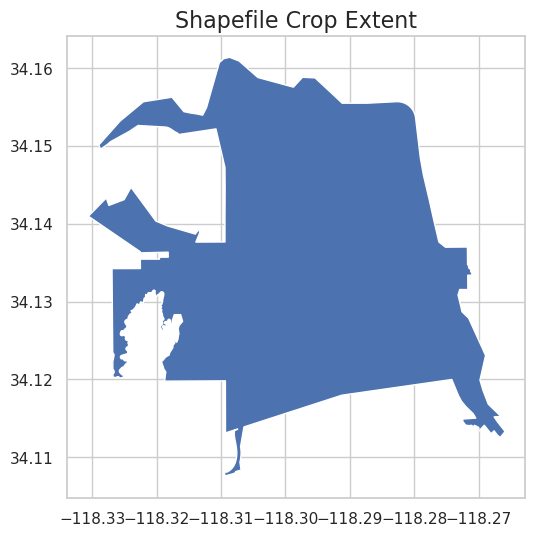

In [123]:
fig, ax = plt.subplots(figsize=(6, 6))

Griffith_boundary.plot(ax=ax)

ax.set_title("Shapefile Crop Extent",
             fontsize=16)
plt.show()

In [125]:
ndvi_2023_clip = ndvi_2023_data.rio.clip(Griffith_boundary.geometry.apply(mapping))
ndvi_2022_clip = ndvi_2022_data.rio.clip(Griffith_boundary.geometry.apply(mapping))

3. Map Griffith Park NDVI side by side for both years. Use an appropriate colorbar.

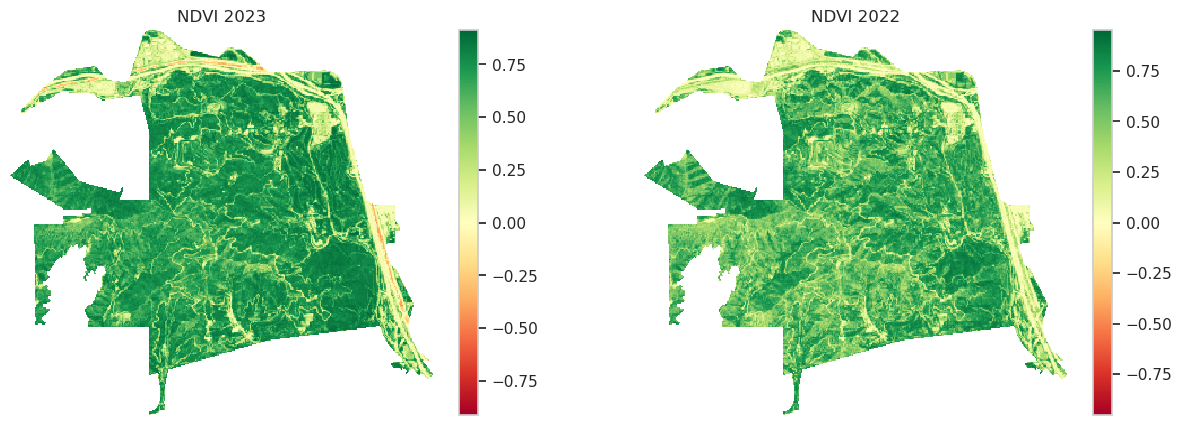

In [127]:
cmap = "RdYlGn"

# Plot newly classified and masked raster
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))
ndvi_2023_clip.plot(cmap=cmap ,ax=ax1)
ndvi_2022_clip.plot(cmap=cmap,ax=ax2)
ax1.set(title="NDVI 2023")
ax1.set_axis_off()
ax2.set(title="NDVI 2022")
ax2.set_axis_off()
plt.show()

4. Using zonal statistics to compare the mean NDVI between the two years. 

In [128]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
%matplotlib inline

save ndvi as int files and load w rasterio and load back in for zonal stats

In [133]:
ndvi_2023_clipped_data_path = os.path.join(NDVI_2023_path, "ndvi-2023-clipped.tif")
ndvi_2022_clipped_data_path = os.path.join(NDVI_2022_path, "ndvi-2022-clipped.tif")

print(ndvi_2023_data_path)
print(ndvi_2022_data_path)

data/2023-03-24/ndvi-2023.tif
data/2022-03-09/ndvi-2022.tif


In [134]:
# Export data to geotiff
ndvi_2023_clip.rio.to_raster(ndvi_2023_clipped_data_path)
ndvi_2022_clip.rio.to_raster(ndvi_2022_clipped_data_path)

In [138]:
# Reopen the data
ndvi_2023_new = rasterio.open(ndvi_2023_clipped_data_path)
ndvi_2022_new = rasterio.open(ndvi_2022_clipped_data_path)

In [139]:
# Read the raster values
array_2023 = ndvi_2023_new.read(1)
# Get the affine
affine_2023 = ndvi_2023_new.transform

In [140]:
# Read the raster values
array_2022 = ndvi_2022_new.read(1)
# Get the affine
affine_2022 = ndvi_2022_new.transform

In [144]:
zs_ndvi_2023 = zonal_stats(ndvi_2023_clip, array_2023, affine=affine_2023, stats=['min', 'max', 'mean', 'median', 'majority'])

KeyError: 'type'

5. Write a few sentences about your zonal stats results and the mapped comparisons from item (3). 

The mapped comparison in item (3), shows a fairly high vegetation index for both years. The majority of the data appers to fall above 0.5 in the index. 

6. Use the following breaks to reclassify the NDVI data: (bands)
- <0: water 
- 0 to 0.2: urban/barren
- 0.2 to 0.5: low vegetation
- $\gt$ 0.5: high vegetation

In [145]:
ndvi_2023_clip.rio.nodata

class_bins = [-np.inf, 0, 0.2, 0.5, np.inf]
class_bins

[-inf, 0, 0.2, 0.5, inf]

In [146]:
ndvi_2022_clip.rio.nodata

class_bins = [-np.inf, 0, 0.2, 0.5, np.inf]
class_bins

[-inf, 0, 0.2, 0.5, inf]

In [147]:
ndvi_2023_clip_class = xr.apply_ufunc(np.digitize,
                                     ndvi_2023_clip,
                                     class_bins)

In [148]:
ndvi_2022_clip_class = xr.apply_ufunc(np.digitize,
                                     ndvi_2022_clip,
                                     class_bins)

7. Plot the two maps using the following parameters:
- ```colors = ['your-color-1', 'your-color-2', 'your-color-3', 'your-color-4']```
- ```class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]```

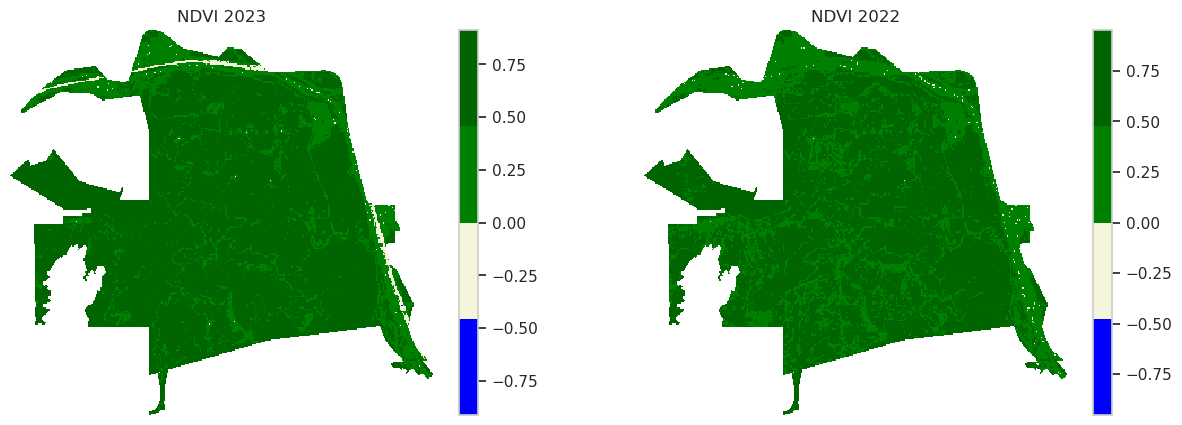

In [149]:
colors = ['blue', 'beige', 'green', 'darkgreen']
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, 
                    len(colors))

f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))
ndvi_2023_clip.plot(cmap=cmap ,ax=ax1)
ndvi_2022_clip.plot(cmap=cmap,ax=ax2)
ax1.set(title="NDVI 2023")
ax1.set_axis_off()
ax2.set(title="NDVI 2022")
ax2.set_axis_off()
plt.show()

8. Create a histogram of the classified NDVI data for both years. Give rough approximations of the percentages of each cateogry (i.e. ~20% water, ~40% barren/urban land etc.) for each year. 

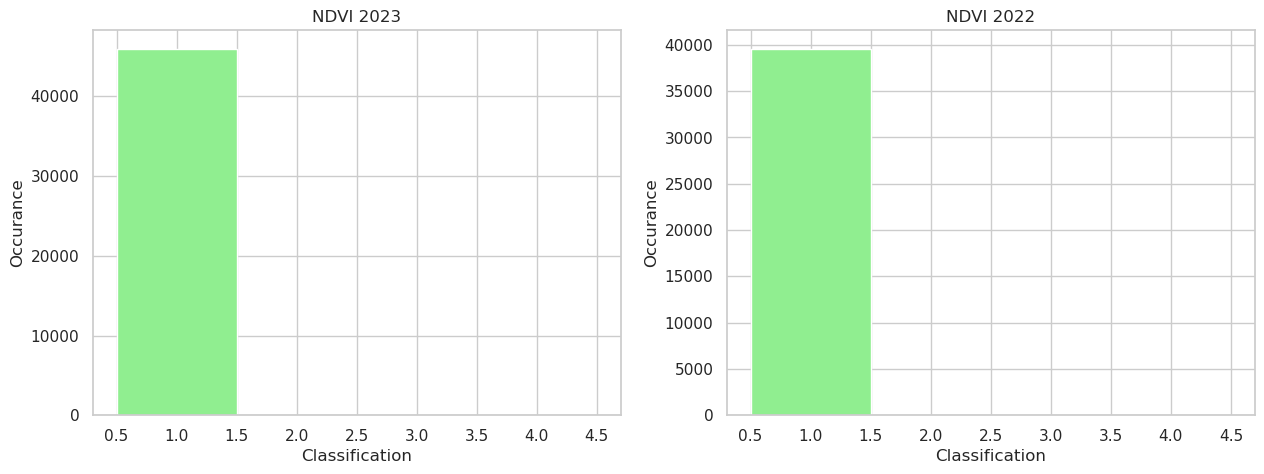

In [153]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))
ndvi_2023_clip.plot.hist(color="lightgreen",
                        bins=[.5, 1.5, 2.5, 3.5, 4.5], ax=ax1)
ndvi_2022_clip.plot.hist(color="lightgreen",
                        bins=[.5, 1.5, 2.5, 3.5, 4.5], ax=ax2)
ax1.set(title="NDVI 2023",
       xlabel="Classification",
       ylabel="Occurance")
ax2.set(title="NDVI 2022",
       xlabel="Classification",
       ylabel="Occurance")
plt.show()



For both year 2022 and 2023, the data falls between the values 0.5-1.5. This indicates high vegetation, as indicated by the the colormap above. The vegetation is slightly greater in the year 2023 than 2022, as seen by a greater occurance value on the y-axis.

## Part 3: Finding the nearest weather stations for parks in LA County for future analysis 
Let's say you are asked to update watering schedules to parks in LA county, depending on current rain conditions. We would need to figure out what is the closest weather station. Let's do this preliminary work to find this.

1. Load the meteorological data again (``` data/noaa-daily-la-county-weather-data.csv ```).

In [1]:
import pandas as pd
noaa_data = pd.read_csv("data/noaa-daily-la-county-weather-data.csv", parse_dates=['DATE'])
noaa_data.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  
0 2018-03-30   0.0  
1 2018-03-31   0.0  
2 2018-04-01   0.0  
3 2018-04-02   0.0  
4 2018-04-03   0.0

2. Calculate total total precipitation for the year 2022 for all weather stations. Drop any stations without precipitation data. How many weather stations remain?  

In [3]:
noaa_data['YEAR'] = noaa_data['DATE'].astype(str).str.slice(start=0,stop=4)
noaa_data.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  YEAR  
0 2018-03-30   0.0  2018  
1 2018-03-31   0.0  2018  
2 2018-04-01   0.0  2018  
3 2018-04-02   0.0  2018  
4 2018-04-03   0.0  2018

In [4]:
year_selection = ["2022"]
data_2022 = noaa_data.loc[noaa_data["YEAR"].isin(year_selection)]
data_2022.reset_index(drop=True)
data_2022.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
1371  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1372  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1373  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1374  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1375  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

           DATE  PRCP  YEAR  
1371 2022-01-01   0.0  2022  
1372 2022-01-02   0.0  2022  
1373 2022-01-03   0.0  2022  
1374 2022-01-04   0.0  2022  
1375 2022-01-05   0.0  2022

In [5]:
cols_to_check = ["PRCP"]
data_2022 = data_2022.dropna(subset=cols_to_check)
data_2022["PRCP"].hasnans

False

In [6]:
len(data_2022)

17401

17401 stations remain

3. Find the nearest weather station to each Los Angeles County park (``` Recreation_and_Parks.geojson```). Capture the name (``` STATION ```) of the closest weather station. Note, this is not as straight forward as just copying and pasting from section-02 week 10! You actually have to think logically what columns are needed (centroids or geometries? what is the target dataframe?). Think carefully! 

In [7]:
import geopandas as gpd

In [8]:
parks = gpd.read_file("data/Recreation_and_Parks.geojson")
parks.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


OBJECTID  Area_Acres Park_ID CD_Real  \
0         1    8.433364     512      03   
1         2    1.387374     883      15   
2         3    3.173861     320      15   
3         4    0.154871     366      08   
4         5    0.960725     213      09   

                                             Address Region  \
0                                   23751 Ingomar St      V   
1  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   
2                                1464 E 109th Street      P   
3                                    4726 8th Avenue      P   
4                                  4800 S. Hoover St      P   

                             Name Park_Class CD_NEW  \
0               Lazy J Ranch Park          N     12   
1              Lookout Point Park          N     15   
2  109th Street Recreation Center          N     15   
3               Angeles Mesa Park          N      8   
4            Julian C. Dixon Park          N      9   

                                             TOOLTIP       ACRES  \
0  Name: Lazy J Ranch Park\nLocation: 23751 Ingom...   8.4333635   
1  Name: Lookout Point Park\nLocation: Adjacent t...  1.38737377   
2  Name: 109th Street Recreation Center\nLocation...  3.17386107   
3  Name: Angeles Mesa Park\nLocation: 4726 8th Av...   0.1548711   
4  Name: Julian C. Dixon Park\nLocation: 4800 S. ...  0.96072542   

                                            geometry  
0  POLYGON ((-118.64451 34.21238, -118.64451 34.2...  
1  POLYGON ((-118.29192 33.71197, -118.29192 33.7...  
2  POLYGON ((-118.24925 33.93590, -118.24917 33.9...  
3  POLYGON ((-118.32523 34.00014, -118.32523 34.0...  
4  POLYGON ((-118.28680 33.99881, -118.28664 33.9...

In [9]:
parks.crs
parks_r = parks.to_crs(epsg=4326)

In [10]:
parks_r['centroid'] = parks_r.centroid
parks_r.head()

/tmp/ipykernel_248356/2909725440.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks_r['centroid'] = parks_r.centroid


OBJECTID  Area_Acres Park_ID CD_Real  \
0         1    8.433364     512      03   
1         2    1.387374     883      15   
2         3    3.173861     320      15   
3         4    0.154871     366      08   
4         5    0.960725     213      09   

                                             Address Region  \
0                                   23751 Ingomar St      V   
1  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   
2                                1464 E 109th Street      P   
3                                    4726 8th Avenue      P   
4                                  4800 S. Hoover St      P   

                             Name Park_Class CD_NEW  \
0               Lazy J Ranch Park          N     12   
1              Lookout Point Park          N     15   
2  109th Street Recreation Center          N     15   
3               Angeles Mesa Park          N      8   
4            Julian C. Dixon Park          N      9   

                                             TOOLTIP       ACRES  \
0  Name: Lazy J Ranch Park\nLocation: 23751 Ingom...   8.4333635   
1  Name: Lookout Point Park\nLocation: Adjacent t...  1.38737377   
2  Name: 109th Street Recreation Center\nLocation...  3.17386107   
3  Name: Angeles Mesa Park\nLocation: 4726 8th Av...   0.1548711   
4  Name: Julian C. Dixon Park\nLocation: 4800 S. ...  0.96072542   

                                            geometry  \
0  POLYGON ((-118.64451 34.21238, -118.64451 34.2...   
1  POLYGON ((-118.29192 33.71197, -118.29192 33.7...   
2  POLYGON ((-118.24925 33.93590, -118.24917 33.9...   
3  POLYGON ((-118.32523 34.00014, -118.32523 34.0...   
4  POLYGON ((-118.28680 33.99881, -118.28664 33.9...   

                      centroid  
0  POINT (-118.64515 34.21312)  
1  POINT (-118.29214 33.71246)  
2  POINT (-118.24859 33.93632)  
3  POINT (-118.32545 34.00021)  
4  POINT (-118.28673 33.99919)

Review week 11 sction 01 for how we converted lat/lon columns of airbnb csv file to geopandas
- look for the function

gpd.points_from_xy

In [11]:
from pysal.model import spreg
from pysal.lib import weights
from scipy import stats
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import osmnx as ox
import folium
sns.set(style="whitegrid")

In [12]:
# Create a GeoDataFrame
data_2022["geometry"] = gpd.points_from_xy(data_2022["LONGITUDE"], data_2022["LATITUDE"])
data_2022 = gpd.GeoDataFrame(data_2022, crs="epsg:4326")
data_2022 = data_2022.reset_index(drop=True)
data_2022.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  YEAR                     geometry  
0 2022-01-01   0.0  2022  POINT (-118.11611 34.13916)  
1 2022-01-02   0.0  2022  POINT (-118.11611 34.13916)  
2 2022-01-03   0.0  2022  POINT (-118.11611 34.13916)  
3 2022-01-04   0.0  2022  POINT (-118.11611 34.13916)  
4 2022-01-05   0.0  2022  POINT (-118.11611 34.13916)

Given:
- parks: polygon area with centroid
- weather station: point

Find: nearest weather station point, to park polygon centroid

In [13]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [14]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""
    
    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union
    
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    
    nearest_value = nearest_data[value_column].values[0]
    
    return nearest_value

In [120]:
parks_r["nearest_station"] = parks_r.apply(get_nearest_values, other_gdf=data_2022, point_column="centroid", value_column="STATION", axis=1)

In [15]:
parks_r["STATION"] = parks_r.apply(get_nearest_values, other_gdf=data_2022, point_column="centroid", value_column="STATION", axis=1)

In [16]:
precipitation_2022 = data_2022[['STATION', 'PRCP','geometry']]
precipitation_2022.head()

STATION  PRCP                     geometry
0  US1CALA0036   0.0  POINT (-118.11611 34.13916)
1  US1CALA0036   0.0  POINT (-118.11611 34.13916)
2  US1CALA0036   0.0  POINT (-118.11611 34.13916)
3  US1CALA0036   0.0  POINT (-118.11611 34.13916)
4  US1CALA0036   0.0  POINT (-118.11611 34.13916)

In [121]:
parks_r.head()

OBJECTID  Area_Acres Park_ID CD_Real  \
0         1    8.433364     512      03   
1         2    1.387374     883      15   
2         3    3.173861     320      15   
3         4    0.154871     366      08   
4         5    0.960725     213      09   

                                             Address Region  \
0                                   23751 Ingomar St      V   
1  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   
2                                1464 E 109th Street      P   
3                                    4726 8th Avenue      P   
4                                  4800 S. Hoover St      P   

                             Name Park_Class CD_NEW  \
0               Lazy J Ranch Park          N     12   
1              Lookout Point Park          N     15   
2  109th Street Recreation Center          N     15   
3               Angeles Mesa Park          N      8   
4            Julian C. Dixon Park          N      9   

                                             TOOLTIP       ACRES  \
0  Name: Lazy J Ranch Park\nLocation: 23751 Ingom...   8.4333635   
1  Name: Lookout Point Park\nLocation: Adjacent t...  1.38737377   
2  Name: 109th Street Recreation Center\nLocation...  3.17386107   
3  Name: Angeles Mesa Park\nLocation: 4726 8th Av...   0.1548711   
4  Name: Julian C. Dixon Park\nLocation: 4800 S. ...  0.96072542   

                                            geometry  \
0  POLYGON ((-118.64451 34.21238, -118.64451 34.2...   
1  POLYGON ((-118.29192 33.71197, -118.29192 33.7...   
2  POLYGON ((-118.24925 33.93590, -118.24917 33.9...   
3  POLYGON ((-118.32523 34.00014, -118.32523 34.0...   
4  POLYGON ((-118.28680 33.99881, -118.28664 33.9...   

                      centroid      STATION nearest_station  
0  POINT (-118.64515 34.21312)  USC00049785     USC00049785  
1  POINT (-118.29214 33.71246)  US1CALA0097     US1CALA0097  
2  POINT (-118.24859 33.93632)  USW00003167     USW00003167  
3  POINT (-118.32545 34.00021)  USW00093134     USW00093134  
4  POINT (-118.28673 33.99919)  USW00093134     USW00093134

4. You should have an updated parks dataframe which captures the ``` STATION ``` name of the nearest weather station. Join the total 2022 total precipitation amounts from part (2) to this dataframe.

In [122]:
precipitation_2022_dissolved =  precipitation_2022.dissolve(by='STATION')
precipitation_2022_dissolved

geometry  PRCP
STATION                                       
US1CALA0001  POINT (-118.29470 34.16890)  0.00
US1CALA0003  POINT (-118.33689 33.79018)  0.00
US1CALA0010  POINT (-118.06642 33.98623)  0.00
US1CALA0014  POINT (-118.42750 34.42680)  0.00
US1CALA0021  POINT (-118.02850 34.16174)  0.00
US1CALA0023  POINT (-117.79646 34.02319)  0.00
US1CALA0036  POINT (-118.11611 34.13916)  0.00
US1CALA0038  POINT (-118.14667 33.77658)  0.04
US1CALA0039  POINT (-118.37042 33.77535)  0.02
US1CALA0043  POINT (-118.10734 34.16192)  0.00
US1CALA0048  POINT (-118.48528 34.03176)  0.00
US1CALA0057  POINT (-118.31046 33.78667)  1.07
US1CALA0060  POINT (-118.48657 34.40642)  0.03
US1CALA0064  POINT (-118.27293 34.08091)  0.00
US1CALA0067  POINT (-118.55691 34.38978)  0.00
US1CALA0068  POINT (-118.08900 33.86750)  0.00
US1CALA0077  POINT (-118.08022 34.68313)  0.01
US1CALA0081  POINT (-117.82381 34.13545)  0.00
US1CALA0083  POINT (-118.23181 34.23706)  0.33
US1CALA0085  POINT (-118.21961 34.10002)  0.09
US1CALA0089  POINT (-118.16541 34.10038)  0.00
US1CALA0090  POINT (-118.20978 34.15343)  0.00
US1CALA0091  POINT (-118.12492 34.16480)  0.00
US1CALA0092  POINT (-118.38880 33.82739)  0.00
US1CALA0096  POINT (-117.71131 34.11355)  0.00
US1CALA0097  POINT (-118.29542 33.72147)  0.04
US1CALA0104  POINT (-118.51380 34.19770)  0.00
US1CALA0108  POINT (-118.74942 34.16745)  0.00
US1CALA0113  POINT (-118.55766 34.18622)  0.02
USC00040144  POINT (-118.13827 34.18211)  0.00
USC00040798  POINT (-118.18849 34.29481)  0.00
USC00041194  POINT (-118.34800 34.18660)  0.00
USC00042090  POINT (-117.88012 34.09180)  0.00
USC00042214  POINT (-118.41390 34.00500)  0.00
USC00042941  POINT (-118.42970 34.70500)  0.00
USC00046602  POINT (-118.40050 34.32940)  0.00
USC00046624  POINT (-118.09380 34.58830)  0.00
USC00046663  POINT (-118.39100 33.79970)  0.00
USC00046719  POINT (-118.14470 34.14830)  0.01
USC00046773  POINT (-117.89690 34.50250)  0.00
USC00047326  POINT (-118.37590 33.83420)  0.00
USC00047776  POINT (-117.90780 34.15530)  0.00
USC00047779  POINT (-117.86080 34.20520)  0.00
USC00047785  POINT (-118.10030 34.08420)  0.00
USC00048014  POINT (-118.45412 34.58998)  0.00
USC00049152  POINT (-118.44270 34.06970)  0.00
USC00049785  POINT (-118.57440 34.18190)  0.00
USW00003122  POINT (-118.34190 33.80160)  0.00
USW00003159  POINT (-118.21255 34.74121)  0.00
USW00003167  POINT (-118.33291 33.92353)  0.00
USW00023129  POINT (-118.14718 33.81177)  0.00
USW00023130  POINT (-118.49146 34.21214)  0.00
USW00023152  POINT (-118.36543 34.19966)  0.00
USW00023174  POINT (-118.38660 33.93816)  0.00
USW00023182  POINT (-118.08309 34.62944)  0.00
USW00023187  POINT (-118.72528 34.74361)  0.00
USW00023191  POINT (-118.41456 33.40419)  0.00
USW00093134  POINT (-118.29110 34.02360)  0.00
USW00093197  POINT (-118.44712 34.02099)  0.00

In [123]:
parks_r_dissolved =  parks_r.dissolve(by='STATION')
parks_r_dissolved

geometry  OBJECTID  \
STATION                                                                    
US1CALA0001  MULTIPOLYGON (((-118.30855 34.10804, -118.3085...        38   
US1CALA0048  MULTIPOLYGON (((-118.52004 34.02838, -118.5197...        15   
US1CALA0057  MULTIPOLYGON (((-118.29683 33.75773, -118.2968...        19   
US1CALA0064  MULTIPOLYGON (((-118.28952 34.05727, -118.2893...         6   
US1CALA0067  MULTIPOLYGON (((-118.55596 34.28831, -118.5560...       169   
US1CALA0083  MULTIPOLYGON (((-118.27540 34.22911, -118.2753...        86   
US1CALA0085  MULTIPOLYGON (((-118.22349 34.04362, -118.2234...         9   
US1CALA0089  MULTIPOLYGON (((-118.18599 34.07438, -118.1859...        29   
US1CALA0090  MULTIPOLYGON (((-118.20834 34.13098, -118.2083...       289   
US1CALA0097  MULTIPOLYGON (((-118.29846 33.71065, -118.2975...         2   
US1CALA0104  MULTIPOLYGON (((-118.50167 34.16047, -118.5016...        17   
US1CALA0108  MULTIPOLYGON (((-118.89436 34.06744, -118.8943...       124   
US1CALA0113  MULTIPOLYGON (((-118.57324 34.22148, -118.5732...       157   
USC00041194  MULTIPOLYGON (((-118.37957 34.12229, -118.3795...        31   
USC00042214  MULTIPOLYGON (((-118.45036 33.95845, -118.4503...        18   
USC00046602  MULTIPOLYGON (((-118.44063 34.26481, -118.4406...        34   
USC00049152  MULTIPOLYGON (((-118.44869 34.05224, -118.4484...        21   
USC00049785  MULTIPOLYGON (((-118.61913 34.19531, -118.6191...         1   
USW00003167  MULTIPOLYGON (((-118.29150 33.89675, -118.2915...         3   
USW00023130  MULTIPOLYGON (((-118.46881 34.16236, -118.4686...         8   
USW00023152  MULTIPOLYGON (((-118.40537 34.15054, -118.4053...        27   
USW00023174  MULTIPOLYGON (((-118.42774 33.91633, -118.4279...       247   
USW00093134  MULTIPOLYGON (((-118.30250 33.98455, -118.3025...         4   
USW00093197  MULTIPOLYGON (((-118.46204 33.97815, -118.4620...        32   

             Area_Acres Park_ID CD_Real  \
STATION                                   
US1CALA0001   28.364399     277      04   
US1CALA0048    1.435851     110      11   
US1CALA0057   21.091325     313      15   
US1CALA0064    0.340301     851      14   
US1CALA0067  695.710868     768      12   
US1CALA0083    1.161249     344      02   
US1CALA0085    0.042956     852      14   
US1CALA0089    0.787427     879      14   
US1CALA0090   10.003120     200      14   
US1CALA0097    1.387374     883      15   
US1CALA0104  152.655986     806      06   
US1CALA0108   69.108785     204      03   
US1CALA0113   17.069311     764      12   
USC00041194    0.734239     280      04   
USC00042214   10.867874     167      10   
USC00046602   23.800272     552      07   
USC00049152   18.642791     108      11   
USC00049785    8.433364     512      03   
USW00003167    3.173861     320      15   
USW00023130   60.449358     751      12   
USW00023152   13.376320     801      06   
USW00023174    0.149489     150      11   
USW00093134    0.154871     366      08   
USW00093197    0.130940     140      11   

                                                       Address Region  \
STATION                                                                 
US1CALA0001                                3900 Chevy Chase Dr      G   
US1CALA0048                                15920 Asilomar Blvd      W   
US1CALA0057                                   1331 Eubank Ave.      P   
US1CALA0064                                  624 E. 6th Street      M   
US1CALA0067                                  17300 Sesnon Blvd      V   
US1CALA0083                           9521 Tujunga Canyon Blvd      V   
US1CALA0085                               1304 Pleasant Avenue      M   
US1CALA0089                                   4301 Via Marisol      M   
US1CALA0090                                1840 Yosemite Drive      M   
US1CALA0097  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   
US1CALA0104                                 16821 Burbank Blvd      V   
US1CALA01

In [124]:
parks_r_dissolved = parks_r_dissolved.dropna(subset=['geometry'])
precipitation_2022_dissolved = precipitation_2022_dissolved.dropna(subset=['geometry'])

In [125]:
parks_r_dissolved.merge(precipitation_2022_dissolved, on = 'STATION')

geometry_x  OBJECTID  \
STATION                                                                    
US1CALA0001  MULTIPOLYGON (((-118.30855 34.10804, -118.3085...        38   
US1CALA0048  MULTIPOLYGON (((-118.52004 34.02838, -118.5197...        15   
US1CALA0057  MULTIPOLYGON (((-118.29683 33.75773, -118.2968...        19   
US1CALA0064  MULTIPOLYGON (((-118.28952 34.05727, -118.2893...         6   
US1CALA0067  MULTIPOLYGON (((-118.55596 34.28831, -118.5560...       169   
US1CALA0083  MULTIPOLYGON (((-118.27540 34.22911, -118.2753...        86   
US1CALA0085  MULTIPOLYGON (((-118.22349 34.04362, -118.2234...         9   
US1CALA0089  MULTIPOLYGON (((-118.18599 34.07438, -118.1859...        29   
US1CALA0090  MULTIPOLYGON (((-118.20834 34.13098, -118.2083...       289   
US1CALA0097  MULTIPOLYGON (((-118.29846 33.71065, -118.2975...         2   
US1CALA0104  MULTIPOLYGON (((-118.50167 34.16047, -118.5016...        17   
US1CALA0108  MULTIPOLYGON (((-118.89436 34.06744, -118.8943...       124   
US1CALA0113  MULTIPOLYGON (((-118.57324 34.22148, -118.5732...       157   
USC00041194  MULTIPOLYGON (((-118.37957 34.12229, -118.3795...        31   
USC00042214  MULTIPOLYGON (((-118.45036 33.95845, -118.4503...        18   
USC00046602  MULTIPOLYGON (((-118.44063 34.26481, -118.4406...        34   
USC00049152  MULTIPOLYGON (((-118.44869 34.05224, -118.4484...        21   
USC00049785  MULTIPOLYGON (((-118.61913 34.19531, -118.6191...         1   
USW00003167  MULTIPOLYGON (((-118.29150 33.89675, -118.2915...         3   
USW00023130  MULTIPOLYGON (((-118.46881 34.16236, -118.4686...         8   
USW00023152  MULTIPOLYGON (((-118.40537 34.15054, -118.4053...        27   
USW00023174  MULTIPOLYGON (((-118.42774 33.91633, -118.4279...       247   
USW00093134  MULTIPOLYGON (((-118.30250 33.98455, -118.3025...         4   
USW00093197  MULTIPOLYGON (((-118.46204 33.97815, -118.4620...        32   

             Area_Acres Park_ID CD_Real  \
STATION                                   
US1CALA0001   28.364399     277      04   
US1CALA0048    1.435851     110      11   
US1CALA0057   21.091325     313      15   
US1CALA0064    0.340301     851      14   
US1CALA0067  695.710868     768      12   
US1CALA0083    1.161249     344      02   
US1CALA0085    0.042956     852      14   
US1CALA0089    0.787427     879      14   
US1CALA0090   10.003120     200      14   
US1CALA0097    1.387374     883      15   
US1CALA0104  152.655986     806      06   
US1CALA0108   69.108785     204      03   
US1CALA0113   17.069311     764      12   
USC00041194    0.734239     280      04   
USC00042214   10.867874     167      10   
USC00046602   23.800272     552      07   
USC00049152   18.642791     108      11   
USC00049785    8.433364     512      03   
USW00003167    3.173861     320      15   
USW00023130   60.449358     751      12   
USW00023152   13.376320     801      06   
USW00023174    0.149489     150      11   
USW00093134    0.154871     366      08   
USW00093197    0.130940     140      11   

                                                       Address Region  \
STATION                                                                 
US1CALA0001                                3900 Chevy Chase Dr      G   
US1CALA0048                                15920 Asilomar Blvd      W   
US1CALA0057                                   1331 Eubank Ave.      P   
US1CALA0064                                  624 E. 6th Street      M   
US1CALA0067                                  17300 Sesnon Blvd      V   
US1CALA0083                           9521 Tujunga Canyon Blvd      V   
US1CALA0085                               1304 Pleasant Avenue      M   
US1CALA0089                                   4301 Via Marisol      M   
US1CALA0090                                1840 Yosemite Drive      M   
US1CALA0097  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   
US1CALA0104                                 16821 Burbank Blvd      V   
US1CALA

In [126]:
new = parks_r_dissolved.merge(precipitation_2022_dissolved, on = 'STATION')

In [127]:
new

geometry_x  OBJECTID  \
STATION                                                                    
US1CALA0001  MULTIPOLYGON (((-118.30855 34.10804, -118.3085...        38   
US1CALA0048  MULTIPOLYGON (((-118.52004 34.02838, -118.5197...        15   
US1CALA0057  MULTIPOLYGON (((-118.29683 33.75773, -118.2968...        19   
US1CALA0064  MULTIPOLYGON (((-118.28952 34.05727, -118.2893...         6   
US1CALA0067  MULTIPOLYGON (((-118.55596 34.28831, -118.5560...       169   
US1CALA0083  MULTIPOLYGON (((-118.27540 34.22911, -118.2753...        86   
US1CALA0085  MULTIPOLYGON (((-118.22349 34.04362, -118.2234...         9   
US1CALA0089  MULTIPOLYGON (((-118.18599 34.07438, -118.1859...        29   
US1CALA0090  MULTIPOLYGON (((-118.20834 34.13098, -118.2083...       289   
US1CALA0097  MULTIPOLYGON (((-118.29846 33.71065, -118.2975...         2   
US1CALA0104  MULTIPOLYGON (((-118.50167 34.16047, -118.5016...        17   
US1CALA0108  MULTIPOLYGON (((-118.89436 34.06744, -118.8943...       124   
US1CALA0113  MULTIPOLYGON (((-118.57324 34.22148, -118.5732...       157   
USC00041194  MULTIPOLYGON (((-118.37957 34.12229, -118.3795...        31   
USC00042214  MULTIPOLYGON (((-118.45036 33.95845, -118.4503...        18   
USC00046602  MULTIPOLYGON (((-118.44063 34.26481, -118.4406...        34   
USC00049152  MULTIPOLYGON (((-118.44869 34.05224, -118.4484...        21   
USC00049785  MULTIPOLYGON (((-118.61913 34.19531, -118.6191...         1   
USW00003167  MULTIPOLYGON (((-118.29150 33.89675, -118.2915...         3   
USW00023130  MULTIPOLYGON (((-118.46881 34.16236, -118.4686...         8   
USW00023152  MULTIPOLYGON (((-118.40537 34.15054, -118.4053...        27   
USW00023174  MULTIPOLYGON (((-118.42774 33.91633, -118.4279...       247   
USW00093134  MULTIPOLYGON (((-118.30250 33.98455, -118.3025...         4   
USW00093197  MULTIPOLYGON (((-118.46204 33.97815, -118.4620...        32   

             Area_Acres Park_ID CD_Real  \
STATION                                   
US1CALA0001   28.364399     277      04   
US1CALA0048    1.435851     110      11   
US1CALA0057   21.091325     313      15   
US1CALA0064    0.340301     851      14   
US1CALA0067  695.710868     768      12   
US1CALA0083    1.161249     344      02   
US1CALA0085    0.042956     852      14   
US1CALA0089    0.787427     879      14   
US1CALA0090   10.003120     200      14   
US1CALA0097    1.387374     883      15   
US1CALA0104  152.655986     806      06   
US1CALA0108   69.108785     204      03   
US1CALA0113   17.069311     764      12   
USC00041194    0.734239     280      04   
USC00042214   10.867874     167      10   
USC00046602   23.800272     552      07   
USC00049152   18.642791     108      11   
USC00049785    8.433364     512      03   
USW00003167    3.173861     320      15   
USW00023130   60.449358     751      12   
USW00023152   13.376320     801      06   
USW00023174    0.149489     150      11   
USW00093134    0.154871     366      08   
USW00093197    0.130940     140      11   

                                                       Address Region  \
STATION                                                                 
US1CALA0001                                3900 Chevy Chase Dr      G   
US1CALA0048                                15920 Asilomar Blvd      W   
US1CALA0057                                   1331 Eubank Ave.      P   
US1CALA0064                                  624 E. 6th Street      M   
US1CALA0067                                  17300 Sesnon Blvd      V   
US1CALA0083                           9521 Tujunga Canyon Blvd      V   
US1CALA0085                               1304 Pleasant Avenue      M   
US1CALA0089                                   4301 Via Marisol      M   
US1CALA0090                                1840 Yosemite Drive      M   
US1CALA0097  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   
US1CALA0104                                 16821 Burbank Blvd      V   
US1CALA

In [84]:
#new_clean = new.drop(columns=['geometry_x'])
#new_clean = new_clean.drop(columns=['geometry_y'])
#new_clean['geometry'] = new_clean['centroid']

In [128]:
new = new.dropna()
new.head()

geometry_x  OBJECTID  \
STATION                                                                    
US1CALA0001  MULTIPOLYGON (((-118.30855 34.10804, -118.3085...        38   
US1CALA0048  MULTIPOLYGON (((-118.52004 34.02838, -118.5197...        15   
US1CALA0057  MULTIPOLYGON (((-118.29683 33.75773, -118.2968...        19   
US1CALA0064  MULTIPOLYGON (((-118.28952 34.05727, -118.2893...         6   
US1CALA0067  MULTIPOLYGON (((-118.55596 34.28831, -118.5560...       169   

             Area_Acres Park_ID CD_Real              Address Region  \
STATION                                                               
US1CALA0001   28.364399     277      04  3900 Chevy Chase Dr      G   
US1CALA0048    1.435851     110      11  15920 Asilomar Blvd      W   
US1CALA0057   21.091325     313      15     1331 Eubank Ave.      P   
US1CALA0064    0.340301     851      14    624 E. 6th Street      M   
US1CALA0067  695.710868     768      12    17300 Sesnon Blvd      V   

                                           Name Park_Class CD_NEW  \
STATION                                                             
US1CALA0001  Griffith Park Central Service Yard          C     13   
US1CALA0048             Palisades-Asilomar Park          N     11   
US1CALA0057                        Banning Park          C     15   
US1CALA0064            6th & Gladys Street Park          N     14   
US1CALA0067                      O'Melveny Park          R     12   

                                                       TOOLTIP         ACRES  \
STATION                                                                        
US1CALA0001  Name: Griffith Park Central Service Yard\nLoca...   28.36439908   
US1CALA0048  Name: Palisades-Asilomar Park\nLocation: 15920...    1.43585094   
US1CALA0057     Name: Banning Park\nLocation: 1331 Eubank Ave.   21.09132548   
US1CALA0064  Name: 6th & Gladys Street Park\nLocation: 624 ...    0.34030051   
US1CALA0067  Name: O'Melveny Park\nLocation: 17300 Sesnon Blvd  695.71086812   

                                centroid nearest_station  \
STATION                                                    
US1CALA0001  POINT (-118.27301 34.13496)     US1CALA0001   
US1CALA0048  POINT (-118.53631 34.03995)     US1CALA0048   
US1CALA0057  POINT (-118.25817 33.79031)     US1CALA0057   
US1CALA0064  POINT (-118.24255 34.04028)     US1CALA0064   
US1CALA0067  POINT (-118.52113 34.31320)     US1CALA0067   

                              geometry_y  PRCP  
STATION                                         
US1CALA0001  POINT (-118.29470 34.16890)  0.00  
US1CALA0048  POINT (-118.48528 34.03176)  0.00  
US1CALA0057  POINT (-118.31046 33.78667)  1.07  
US1CALA0064  POINT (-118.27293 34.08091)  0.00  
US1CALA0067  POINT (-118.55691 34.38978)  0.00

In [129]:
new_clean = new[['geometry_x', 'Name', 'PRCP', 'nearest_station']]
new_clean.head()

geometry_x  \
STATION                                                          
US1CALA0001  MULTIPOLYGON (((-118.30855 34.10804, -118.3085...   
US1CALA0048  MULTIPOLYGON (((-118.52004 34.02838, -118.5197...   
US1CALA0057  MULTIPOLYGON (((-118.29683 33.75773, -118.2968...   
US1CALA0064  MULTIPOLYGON (((-118.28952 34.05727, -118.2893...   
US1CALA0067  MULTIPOLYGON (((-118.55596 34.28831, -118.5560...   

                                           Name  PRCP nearest_station  
STATION                                                                
US1CALA0001  Griffith Park Central Service Yard  0.00     US1CALA0001  
US1CALA0048             Palisades-Asilomar Park  0.00     US1CALA0048  
US1CALA0057                        Banning Park  1.07     US1CALA0057  
US1CALA0064            6th & Gladys Street Park  0.00     US1CALA0064  
US1CALA0067                      O'Melveny Park  0.00     US1CALA0067

In [130]:
new_clean.rename(columns={'geometry_x': 'geometry'}, inplace=True)

/tmp/ipykernel_248356/157226910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_clean.rename(columns={'geometry_x': 'geometry'}, inplace=True)


In [131]:
new_clean = gpd.GeoDataFrame(new_clean)
new_clean.head()

geometry  \
STATION                                                          
US1CALA0001  MULTIPOLYGON (((-118.30855 34.10804, -118.3085...   
US1CALA0048  MULTIPOLYGON (((-118.52004 34.02838, -118.5197...   
US1CALA0057  MULTIPOLYGON (((-118.29683 33.75773, -118.2968...   
US1CALA0064  MULTIPOLYGON (((-118.28952 34.05727, -118.2893...   
US1CALA0067  MULTIPOLYGON (((-118.55596 34.28831, -118.5560...   

                                           Name  PRCP nearest_station  
STATION                                                                
US1CALA0001  Griffith Park Central Service Yard  0.00     US1CALA0001  
US1CALA0048             Palisades-Asilomar Park  0.00     US1CALA0048  
US1CALA0057                        Banning Park  1.07     US1CALA0057  
US1CALA0064            6th & Gladys Street Park  0.00     US1CALA0064  
US1CALA0067                      O'Melveny Park  0.00     US1CALA0067

5. Create an interactive map which plots the park locations and has a ``` Tooltip ``` capability of showing the ``` Name ``` of the park (using alias of ``` Park Name ```) and the name of the closest weather station using the alias of ``` Nearest Weather Station ``` as well as the total 2022 precipitation amount using the alias of ``` Total 2022 Rainfall (in) ```.

In [132]:
import folium

In [133]:
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt

In [134]:
gjson_converted = folium.features.GeoJson(new_clean, name="Parks")

In [138]:
# Create a Map instance
m = folium.Map(location=[34.13496, -118.53631], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)

# Add points to the map instance
new_clean.add_to(m)

#Show map
m

AttributeError: 'GeoDataFrame' object has no attribute 'add_to'

In [139]:
# Convert points to GeoJson
folium.features.GeoJson(new_clean,  
                        name='Labels',
                        style_function=lambda x: {'color':'transparent','fillColor':'transparent','weight':0},
                        tooltip=folium.features.GeoJsonTooltip(fields=['Name','nearest_station','PRCP'],
                                                                aliases = ['Park Name','Nearest Weather Station','Totall 2022 Rainfall (in)'],
                                                                labels=True,
                                                                sticky=False
                                                                            )
                       ).add_to(m)

m

6. Save and publish this map to GitHub. Paste the link to view it.

In [ ]:
outfp = "park_weather_map.html"
m.save(outfp)

https://kristinhernandez.github.io/Geospatial-Data-Analytics/park_weather_map.html